# Kave Ar-Ge Odaklı Yapay Zeka Eğitimi Sınav Sorusu 
Bu çalışma kapsamında sizden öncelikle movielens verisetini kullanarak filmler arasındaki benzerlikleri bulmanız. Ardından bu benzerlikleri kullanarak kişilere film önerisi yapmanızdır. Sonrasında ise bu öneri yapan fonksiyonu Streamlit ile bir uygulama haline getirip kodlarını bizimle paylaşmanızı bekliyoruz.

# Önemli Not: Başvuru kabulü için size sorulan soruyu çözmenizden çok, o soruyu çözmek için ne kadar uğraştığınız önemlidir. Motivasyonu yüksek gençlerle çalışmak çok farklı, bunu biliyoruz, sizi önemsiyoruz ve bekliyoruz.



# Soru İçeriği

#### 1. MovieLens verisetini kullanarak film önerisi yapan bir algoritmanın yazılması
#### 2. Kişiden film ismi alınınca ona benzer filmleri önerebilen fonksiyonun yazılması
#### 3. Çözümün Streamlit ile bu kullanıcının kullanabileceği bir uygulama haline getirilmesi

# 1. MovieLens verisetini kullanarak film önerisi yapan bir algoritmanın yazılması

Bu bölüm kapsamında sizden ekte sunduğumuz verisetinden filmlerin arasındaki benzerliği bulabileceğiniz ve bu benzerlikler üzerinden kullanıcılara film önerebileceğiniz bir algoritma geliştirmenizi bekliyoruz. 

Bu bölümde yardım alabileceğiniz kaynaklar
- [How To Build Your First Recommender System Using Python & MovieLens Dataset](https://analyticsindiamag.com/how-to-build-your-first-recommender-system-using-python-movielens-dataset/)
- [Build Recommender Systems with Movielens Dataset in Python](https://www.codespeedy.com/build-recommender-systems-with-movielens-dataset-in-python/)
- [Collaborative Filtering for Movie Recommendations](https://www.kaggle.com/code/faressayah/collaborative-filtering-for-movie-recommendations)

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
os.listdir('datasets')

['movies.csv', 'ratings.csv']

In [3]:
movies = pd.read_csv('datasets/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings = pd.read_csv('datasets/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### Verisetlerini bir araya getirelim. 

In [5]:
# MovieID üzerinden kişilerin yorumlarına film isimlerini ve genrelerini ekliyoruz. 
df = pd.merge(ratings, movies, how='left', on='movieId')

df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


## 2. Kişiden film ismi alınınca ona benzer filmleri önerebilen fonksiyonun yazılması

Bundan sonrasında verisetini kullanıp çeşitli ön işlemelerden ve geliştirmelerden sonra alttaki gibi bir fonksiyon oluşturmanızı bekliyoruz. 

Average Rating

The dataset is a collection of ratings by a number of users for different movies. Let’s find out the average rating for each and every movie in the dataset.

In [6]:
Average_ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
Average_ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


Total Number Of Rating 

The rating of a movie is proportional to the total number of ratings it has. Therefore, we will also consider the total ratings cast for each movie.

In [7]:
Average_ratings['Total Ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
Average_ratings.head()

,rating,Total Ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


Calculating The Correlation

The following code will create a table where the rows are userIds and the columns represent the movies. The values of the matrix represent the rating for each movie by each user.

In [8]:
movie_user = df.pivot_table(index='userId',columns='title',values='rating')
movie_user.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To find the correlation value for the movie with all other movies in the data we will pass all the ratings of the picked movie to the corrwith method of the Pandas Dataframe. The method computes the pairwise correlation between rows or columns of a DataFrame with rows or columns of Series or DataFrame. 

In [9]:
correlations = movie_user.corrwith(movie_user['Braveheart (1995)'])
correlations.head(10)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'71 (2014)                                      NaN
'Hellboy': The Seeds of Creation (2004)         NaN
'Round Midnight (1986)                          NaN
'Salem's Lot (2004)                             NaN
'Til There Was You (1997)                       NaN
'Tis the Season for Love (2015)                 NaN
'burbs, The (1989)                         0.332504
'night Mother (1986)                            NaN
(500) Days of Summer (2009)                0.021388
*batteries not included (1987)            -1.000000
dtype: float64

Now we will remove all the empty values and merge the total ratings to the correlation table.

In [10]:
recommendation = pd.DataFrame(correlations,columns=['Correlation'])
recommendation.dropna(inplace=True)
recommendation = recommendation.join(Average_ratings['Total Ratings'])
recommendation.head(10)

,Correlation,Total Ratings
title,,
"'burbs, The (1989)",0.332504,17
(500) Days of Summer (2009),0.021388,42
*batteries not included (1987),-1.000000,7
...And Justice for All (1979),0.327327,3
10 Cloverfield Lane (2016),0.534522,14
10 Items or Less (2006),-1.000000,3
10 Things I Hate About You (1999),0.034926,54
"10,000 BC (2008)",-0.141456,17
101 Dalmatians (1996),-0.139975,47


In [11]:
recc = recommendation[recommendation['Total Ratings']>80].sort_values('Correlation',ascending=False).reset_index()
recc = recc.merge(movies,on='title', how='left')
recc.head(10)

,title,Correlation,Total Ratings,movieId,genres
0,Braveheart (1995),1.000000,237,110,Action|Drama|War
1,Batman Begins (2005),0.610550,116,33794,Action|Crime|IMAX
2,Top Gun (1986),0.600929,83,1101,Action|Romance
3,Ocean's Eleven (2001),0.575751,119,4963,Crime|Thriller
4,V for Vendetta (2006),0.569011,100,44191,Action|Sci-Fi|Thriller|IMAX
5,Inception (2010),0.555414,143,79132,Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX
6,Contact (1997),0.499123,82,1584,Drama|Sci-Fi
7,"Matrix, The (1999)",0.496045,278,2571,Action|Sci-Fi|Thriller
8,American History X (1998),0.492451,129,2329,Crime|Drama
9,"Santa Clause, The (1994)",0.489641,81,317,Comedy|Drama|Fantasy


In [12]:
def film_oner(selected_element):
 
    Average_ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
    Average_ratings['Total Ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
    movie_user = df.pivot_table(index='userId',columns='title',values='rating')
    correlations = movie_user.corrwith(movie_user[selected_element])
    recommendation = pd.DataFrame(correlations,columns=['Correlation'])
    recommendation.dropna(inplace=True)
    recommendation = recommendation.join(Average_ratings['Total Ratings'])
    recc = recommendation[recommendation['Total Ratings']>80].sort_values('Correlation',ascending=False).reset_index()
    recc = recc.merge(movies,on='title', how='left')
    reccs = recc.iloc[:,0]
    reccs = reccs.iloc[1:6]

    return reccs

## 3. Çözümün Streamlit ve Ngrok ile kullanıcının kullanabileceği bir uygulama haline getirilmesi

Bu kısımda ise oluşturduğunuz fonksiyonu ektekine benzer bir arayüzde çalıştırmanızı bekliyoruz. 

Yararlanabileceğiniz kaynaklar;
- [How to Collect user inputs with Streamlit](https://www.youtube.com/watch?v=RHzjE-WBaSk)
- [8 Best Streamlit Machine Learning Web App Examples in 2022](https://omdena.com/blog/streamlit-web-app-examples/)

In [13]:
!pip install -q streamlit

In [14]:
 !./ngrok authtokens 2GmKI073GxVC1HNi3PVkATQ4dIQ_draENMJQ7xG5Lnk4Ab4A 

/bin/bash: ./ngrok: No such file or directory


In [15]:
!pip install pyngrok 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
from pyngrok import ngrok 
public_url = ngrok.connect(port='8501')
public_url

<NgrokTunnel: "http://0049-35-196-99-18.ngrok.io" -> "http://localhost:80">

In [17]:
reccs = recc.iloc[:,0]
reccs = reccs.iloc[1:6].values.tolist()
print(reccs)

['Batman Begins (2005)', 'Top Gun (1986)', "Ocean's Eleven (2001)", 'V for Vendetta (2006)', 'Inception (2010)']


In [18]:
%%writefile MovieRecommender.py
import streamlit as st
import pandas as pd
import numpy as np
import os
os.listdir('datasets')
movies = pd.read_csv('datasets/movies.csv')
ratings = pd.read_csv('datasets/ratings.csv')
df = pd.merge(ratings, movies, how='left', on='movieId')

st.write('# Movie Recommender')
st.write('##### Write your favorite movie ')
st.write("only movies in dataset can be selected")

names = movies.iloc[:,1].values
selected_element = st.sidebar.selectbox("Choose a movie", options = names)
st.markdown(f"your favourite movie: {selected_element}")

Average_ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
Average_ratings['Total Ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
movie_user = df.pivot_table(index='userId',columns='title',values='rating')
correlations = movie_user.corrwith(movie_user[selected_element])
recommendation = pd.DataFrame(correlations,columns=['Correlation'])
recommendation.dropna(inplace=True)
recommendation = recommendation.join(Average_ratings['Total Ratings'])
recc = recommendation[recommendation['Total Ratings']>80].sort_values('Correlation',ascending=False).reset_index()
recc = recc.merge(movies,on='title', how='left')

reccs = recc.iloc[:,0]
reccs = reccs.iloc[1:6]

st.markdown(f"*your recommended movies, you will love them*! **{reccs}**")


Overwriting MovieRecommender.py


In [19]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import os
os.listdir('datasets')
movies = pd.read_csv('datasets/movies.csv')
ratings = pd.read_csv('datasets/ratings.csv')
df = pd.merge(ratings, movies, how='left', on='movieId')

st.write('# Movie Recommender')
st.write('##### Write your favorite movie ')
st.write("only movies in dataset can be selected")

names = movies.iloc[:,1].values
selected_element = st.sidebar.selectbox("Choose a movie", options = names)
st.markdown(f"your favourite movie: {selected_element}")

def film_oner(selected_element):
 
    Average_ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
    Average_ratings['Total Ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
    movie_user = df.pivot_table(index='userId',columns='title',values='rating')
    correlations = movie_user.corrwith(movie_user[selected_element])
    recommendation = pd.DataFrame(correlations,columns=['Correlation'])
    recommendation.dropna(inplace=True)
    recommendation = recommendation.join(Average_ratings['Total Ratings'])
    recc = recommendation[recommendation['Total Ratings']>80].sort_values('Correlation',ascending=False).reset_index()
    recc = recc.merge(movies,on='title', how='left')
    reccs = recc.iloc[:,0]
    reccs = reccs.iloc[1:6]

    return reccs

st.markdown(f"*your recommended movies, you will love them*! **{film_oner(selected_element)}**")


Overwriting app.py


MovieRecommender.py and app.py both work the same. The only difference is that `film_oner` requested in the question is used as a *function*.

In [20]:
!streamlit run /content/MovieRecommender.py & npx localtunnel --port 8501

npx: installed 22 in 2.551s


your url is: https://deep-carrots-kiss-35-196-99-18.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.196.99.18:8501

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
  Stopping...
^C


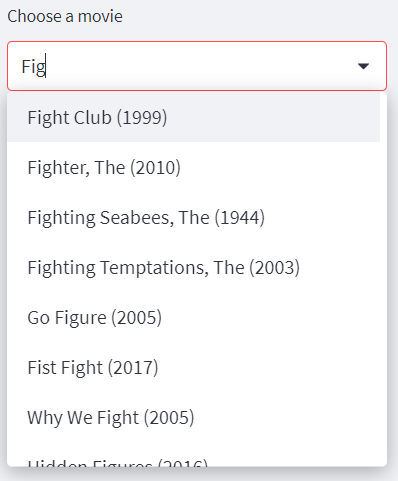

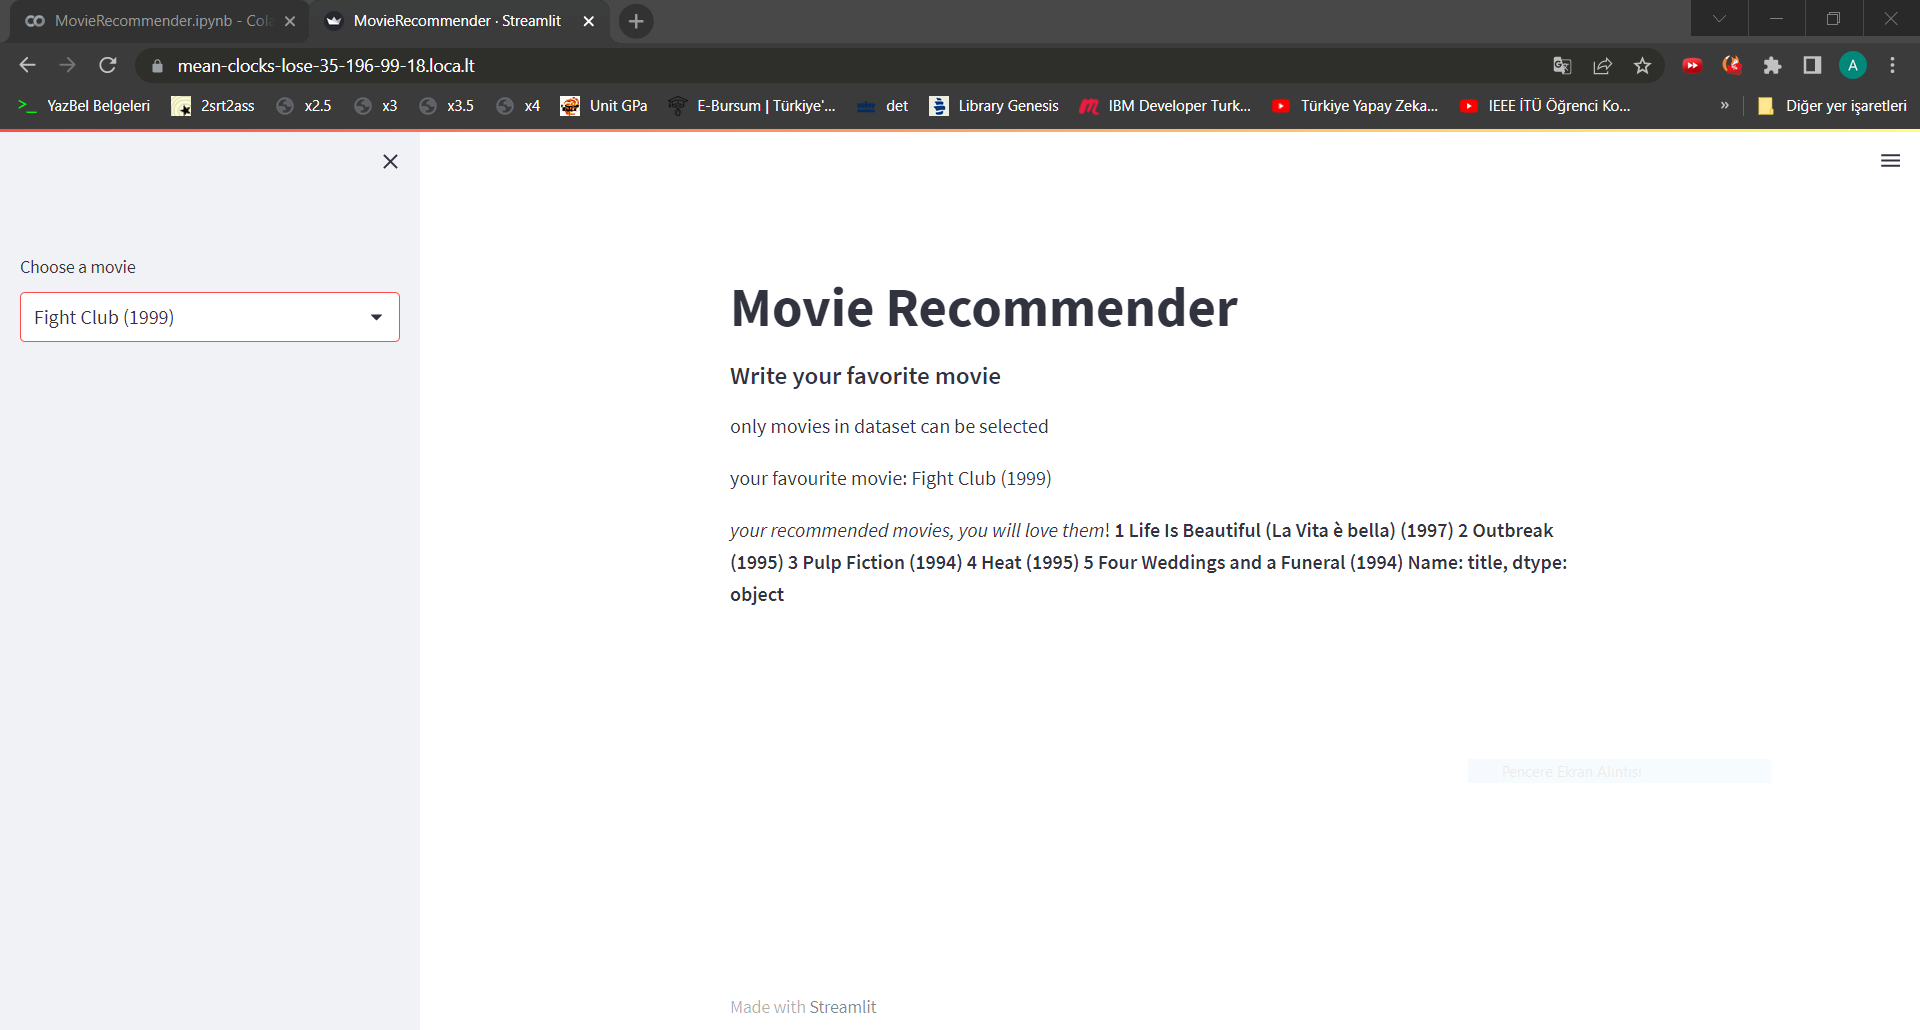